### Eligibility Prediction for Loan

Link: https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan

### Context

    Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

    Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
# Drop Loan_ID column - identification purposes only - no impact on loan's approval

df = df.drop('Loan_ID', axis=1)

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Text(0, 0.5, 'Null_Values Ratio')

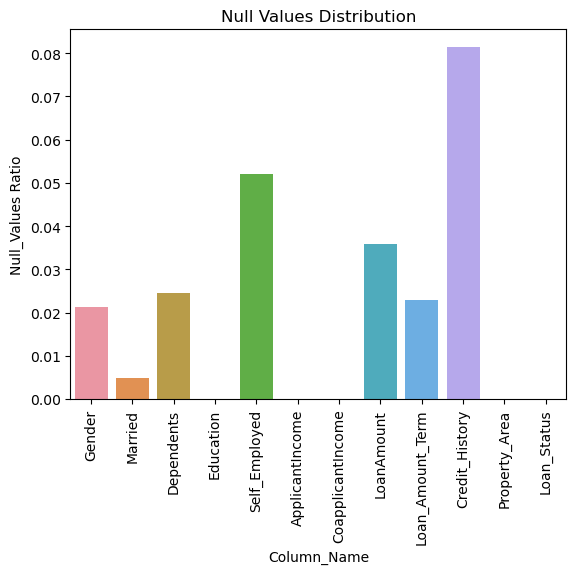

In [5]:
# 614 entries - let's deal with the NULL values

# Chart showing the percentage of NULL values vs Total Entries (#614)

column_id_name = []
ratio_null = []


for i in range(len(df.columns)):
    column_id_name.append(df.columns[i])
    null_count = len(df[df[df.columns[i]].isnull() == True])
    if null_count == 0:
        ratio_null.append(0)
    else:
        ratio_null.append(null_count/614)

        
plt.title('Null Values Distribution')
plt.xticks(rotation=90)
sns.barplot(x=column_id_name, y=ratio_null)
plt.xlabel('Column_Name')
plt.ylabel('Null_Values Ratio')

In [6]:
ratio_null.sort()
ratio_null

[0,
 0,
 0,
 0,
 0,
 0.004885993485342019,
 0.021172638436482084,
 0.02280130293159609,
 0.024429967426710098,
 0.035830618892508145,
 0.05211726384364821,
 0.08143322475570032]

In [7]:
# 7/12 columns contain null values
# Highest concentration found in Credit_History

df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [8]:
# Dropping NULL entries would compromise dataset - approximately 8% of dataset

# Due to lack of dataset summary, I assume Credit_History = 1 for those that either have a credit history or that have shared
# their credit history with the housing finance company. It makes sense to consider the second option since it is very unlikely
# for someone applying for a house loan to not have a credit history. It is likely that this column is to identify those
# that have shared their information. Thus, it makes more sens to convert the NULL values to a 0. 
df['Credit_History'] = df['Credit_History'].fillna(0)

# Dtype float64 is also unnecessary - memory efficiency
df['Credit_History'] = df['Credit_History'].astype('int8')

# Check result
df['Credit_History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Credit_History
Non-Null Count  Dtype
--------------  -----
614 non-null    int8 
dtypes: int8(1)
memory usage: 746.0 bytes


In [9]:
# Move on to Dependents
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [10]:
# Remove '+' from 3+ to generalize --> no impact on data integrity
df['Dependents'] = df['Dependents'].str[:1]

# Fill the NULL dependents with 0. Assuming the NULL spaces represent individuals that filled application with NOT APPLICABLE.  
df['Dependents'] = df['Dependents'].fillna(0)

# dtype: object to int8
df['Dependents'] = df['Dependents'].astype('int8')


In [11]:
# Moving on to 'Married' - 3 NULL values only
# Assumption : dropping these entries would not impact data integrity - 0.5% of data from dataset
# This approach seems more appropriate than assuming 'Not Married'

df[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1,Urban,Y
228,Male,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1,Semiurban,Y
435,Female,NaN,0,Graduate,No,10047,0.0,NaN,240.0,1,Semiurban,Y


In [12]:
# Drop rows at found indexes above
df = df.drop([104, 228, 435])

In [13]:
len(df)

611

In [14]:
# Moving on to 'Gender'
df['Gender'].info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 0 to 613
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
598 non-null    object
dtypes: object(1)
memory usage: 9.5+ KB


In [15]:
# Impute missing values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'].info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 0 to 613
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
611 non-null    object
dtypes: object(1)
memory usage: 9.5+ KB


In [16]:
# Moving on to 'Self-Employed'
df['Self_Employed'].value_counts()

Self_Employed
No     497
Yes     82
Name: count, dtype: int64

In [17]:
# Once again, I am going to assume NULL values mean NOT-APPLICABLE. Thus NULL values = 'No'. It is also the mode. 
df['Self_Employed'].fillna('No', inplace=True)
df['Self_Employed'].info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 0 to 613
Series name: Self_Employed
Non-Null Count  Dtype 
--------------  ----- 
611 non-null    object
dtypes: object(1)
memory usage: 9.5+ KB


In [18]:
# Moving on to Loan_Amount
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
128.0    11
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [19]:
# Fill null values with the mean & change dtype to float16
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['LoanAmount'] = df['LoanAmount'].astype('float16')
df['LoanAmount'].info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 0 to 613
Series name: LoanAmount
Non-Null Count  Dtype  
--------------  -----  
611 non-null    float16
dtypes: float16(1)
memory usage: 6.0 KB


In [20]:
# Moving on to 'Loan_Amount_Term'
# Do the same as 'LoanAmount'
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('float16')
df['Loan_Amount_Term'].info()

<class 'pandas.core.series.Series'>
Index: 611 entries, 0 to 613
Series name: Loan_Amount_Term
Non-Null Count  Dtype  
--------------  -----  
611 non-null    float16
dtypes: float16(1)
memory usage: 6.0 KB


In [21]:
# Let's check the final result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             611 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         611 non-null    int8   
 3   Education          611 non-null    object 
 4   Self_Employed      611 non-null    object 
 5   ApplicantIncome    611 non-null    int64  
 6   CoapplicantIncome  611 non-null    float64
 7   LoanAmount         611 non-null    float16
 8   Loan_Amount_Term   611 non-null    float16
 9   Credit_History     611 non-null    int8   
 10  Property_Area      611 non-null    object 
 11  Loan_Status        611 non-null    object 
dtypes: float16(2), float64(1), int64(1), int8(2), object(6)
memory usage: 46.5+ KB


In [22]:
# Encode Categorical Features -> One-Hot Encoding seems more appropriate 
X = df.drop('Loan_Status', axis=1)
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])
X_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,No,Graduate,No,Urban
1,Male,Yes,Graduate,No,Rural
2,Male,Yes,Graduate,Yes,Urban
3,Male,Yes,Not Graduate,No,Urban
4,Male,No,Graduate,No,Urban


In [23]:
X_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,146.375,360.0,1
1,1,4583,1508.0,128.000,360.0,1
2,0,3000,0.0,66.000,360.0,1
3,0,2583,2358.0,120.000,360.0,1
4,0,6000,0.0,141.000,360.0,1


In [24]:
# One-hot encode categorical columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=True).astype(int)
# Concatenate one-hot encoded categorical columns with numeric columns
X_encoded = pd.concat([X_num, X_cat_encoded], axis=1)

# Feature vs Label

X = X_encoded
y = df['Loan_Status']

X_encoded.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,146.375,360.0,1,1,0,0,0,0,1
1,1,4583,1508.0,128.000,360.0,1,1,1,0,0,0,0
2,0,3000,0.0,66.000,360.0,1,1,1,0,1,0,1
3,0,2583,2358.0,120.000,360.0,1,1,1,1,0,0,1
4,0,6000,0.0,141.000,360.0,1,1,0,0,0,0,1


In [25]:
# Logistic Regression Application

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(penalty='elasticnet', solver='saga', l1_ratios=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.80,0.9,1], cv=10, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(cv=10,
                     l1_ratios=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                     penalty='elasticnet', random_state=42, solver='saga')

In [49]:
prediction = model.predict(X_test_scaled)

In [59]:
from sklearn.metrics import accuracy_score, f1_score

In [53]:
accuracy_score(y_test, prediction)

0.7771739130434783

In [55]:
model.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.65585671, 0.        , 0.07598216, 0.        , 0.        ,
        0.21121297, 0.        ]])

In [ ]:
# The model is yielding an accuracy of 78%. To understand whether this is acceptable more information on the dataset is needed.
# To improve this, reviewing the feature set is a must and would require the dropping of some unnecessary columns. 